In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
annType = ['segm','bbox']
annType = annType[1]      #specify type here
print 'Running demo for *%s* results.'%type

Running demo for *<type 'type'>* results.


In [3]:
#initialize COCO ground truth api
dataDir='../'
dataType='val2014'
annFile = '%s/annotations/instances_%s.json'%(dataDir,dataType)
cocoGt=COCO(annFile)

loading annotations into memory...
0:00:06.389674
creating index...
index created!


In [4]:
#initialize COCO detections api
resFile='%s/results/instances_%s_fake%s100_results.json'
resFile = resFile%(dataDir, dataType, annType)
cocoDt=cocoGt.loadRes(resFile)

Loading and preparing results...     
DONE (t=0.02s)
creating index...
index created!


In [5]:
# visialuze gt and dt side by side
imgIds=sorted(cocoGt.getImgIds())
imgIds=imgIds[0:100]
imgId = imgIds[np.random.randint(100)]
img = cocoGt.loadImgs(imgId)[0]
I = io.imread('%s/images/val2014/%s'%(dataDir,img['file_name']))

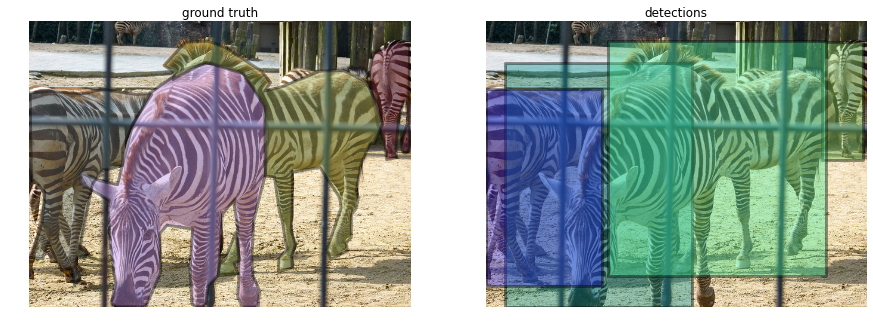

In [6]:
# visialuze gt and dt side by side
fig = plt.figure(figsize=[15,10])

# ground truth
plt.subplot(121)
plt.imshow(I); plt.axis('off'); plt.title('ground truth')
annIds = cocoGt.getAnnIds(imgIds=imgId)
anns = cocoGt.loadAnns(annIds)
cocoDt.showAnns(anns)

# detections
plt.subplot(122)
plt.imshow(I); plt.axis('off'); plt.title('detections')
annIds = cocoDt.getAnnIds(imgIds=imgId)
anns = cocoDt.loadAnns(annIds)
cocoGt.showAnns(anns)

In [7]:
# running evaluation
cocoEval = COCOeval(cocoGt,cocoDt)
cocoEval.params.imgIds  = imgIds
cocoEval.params.useSegm = (annType == 'segm')
cocoEval.evaluate()
cocoEval.accumulate()
print cocoEval

Running per image evaluation...      
DONE (t=0.13s).
Accumulating evaluation results...   
DONE (t=0.39s).
AP of bbox results is 0.5688



In [8]:
# precision at a fixed IoU threshold
ind = 9 # index corresponds to IoU at .5
iou_th = cocoEval.params.iouThrs[ind]
precision = cocoEval.eval['precision'][ind, :, :]
ap = np.mean(precision[precision>-1])
print 'AP: %.04f at %.02f IoU threshold'%(ap, iou_th)

AP: 0.6972 at 0.50 IoU threshold
